In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import lux

## Importing excel sheet in dataframe

In [2]:
df = pd.read_excel("Win_Prediction_Data.xlsx")
print(df.shape)
df.head()

(10061, 9)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### As we can see there is total 10061 rows, 9 columns

# Pre - Processing 

## Step 1 - Handling Missing Values

In [3]:
df.isna().sum()/len(df)*100

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### There only one column which has missing value.
#### Client Category contains object so we can replace missing value by mode (Most Occuring Word in client category)

In [4]:
df['Client Category'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
df['Client Category'] = df['Client Category'].fillna('Others')

In [6]:
df.isna().sum()/len(df)*100

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
for i in df.columns:
    print("*********",i,"*******")
    print()
    print(set(df[i].tolist()))

********* Client Category *******

{'Medical ', 'e-commerce', 'Retail_market', 'Tech', 'Internal', 'Energy', 'Consulting', 'Domestic Public Bank', 'Consumer Good', 'Holding', 'Power ind', 'Management', 'Govt Bank Special', 'Domestic Bank', 'Finance', 'Healthcare', 'Research Development', 'Manufacturing', 'International Bank', 'Others', 'Pharma', 'Tax_audit', 'Energy ', 'Media_Journal', 'Infrastructure', 'Share_market', 'Hospitality', 'Industries', 'Logistics', 'Govt', 'International Org', 'Services_based', 'Knowledge', 'Domestic Private Bank', 'Payment', 'Airpline', 'Automobiles', 'Real Estate', 'Electronics', 'Insurance', 'Telecom'}
********* Solution Type *******

{'Solution 8', 'Solution 34', 'Solution 7', 'Solution 49', 'Solution 28', 'Solution 25', 'Solution 1', 'Solution 41', 'Solution 4', 'Solution 30', 'Solution 61', 'Solution 9', 'Solution 26', 'Solution 60', 'Solution 20', 'Solution 22', 'Solution 33', 'Solution 29', 'Solution 42', 'Solution 58', 'Solution 36', 'Solution 38',

#### As we can see there extra variables in VP & Managers Name

In [8]:
df['VP Name'] = df['VP Name'].str.replace('\xa0', ' ')

In [9]:
df['Manager Name'] = df['Manager Name'].str.replace('\xa0', ' ')

In [10]:
df['VP Name'].unique()

array(['Ekta Zutshi', 'Mervin Harwood', 'Sargar Deep Rao', 'Lilli Storrs',
       'Long Bergstrom', 'Rosanna Maynez', 'Mangesh K. Singh',
       'Brendon Wycoff', 'neeraj kumar', 'Rahul Bajpai',
       'Son Mcconnaughy', 'Saurabh Singh', 'Rudraksh Sharma',
       'Hardeep Suksma', 'Varsha Arora', 'som dutt', 'Ankita Aggarwal',
       'Clinton Mani', 'Marcella Mo', 'Dennis Faux', 'Earline Langton',
       'Russell Dahlen', 'Gopa Trilochana', 'Kamelesh Srinivasan',
       'Gaurav Sameria', 'Manpreet Singh', 'Man Suddeth', 'Molly Eakes',
       'Vidur Hukle', 'Gayle Molter', 'Alam Syed', 'Rahul Kocher',
       'Vikram Rawat', 'Jewell Tunstall', 'Jitendra Choudhary',
       'Mayank Mewar', 'Kirk Hofmeister', 'P. Somya', 'Prashant Rawat',
       'Visvajeet Das', 'Waylon Mulder', 'Sarthak Batra', 'md. afsar'],
      dtype=object)

In [11]:
df['Manager Name'].unique()

array(['Gopa Trilochana', 'Russell Dahlen', 'rahul sharma', 'Vidur Hukle',
       'Md. Daud', 'Hardeep Suksma', 'Luv Malhotra', 'Lino Batterton',
       'Sang Ingle', 'shafibul', 'Anand S. Pandey', 'Molly Eakes',
       'Prateek Dhotre', 'Roopal Singh', 'Desmond Krout',
       'Jean Sappington', 'Mangesh K. Singh', 'Abhinav Warrier',
       'Saurabh Singh', 'Tanuj Bindra', 'nahar singh', 'D. Ankit ',
       'Muoi Queener', 'Ayusha Gupta', 'Rudraksh Sharma', 'Ekta Zutshi',
       'Fredricka Bald', 'Ganesh Malwar', 'Kamelesh Srinivasan',
       'Jewell Tunstall', 'Ankita Aggarwal', 'Somnath Mukherji',
       'Tafeeq Khan', 'Rosana Yokum', 'Gaurav Sameria', 'Rahul Bajpai',
       'Dennis Faux', 'Theron Rex', 'Shobhit Gupta', 'Marcella Mo',
       'Rahul Kocher', 'Akshay Sharma', 'ram kumar', 'Sanchita Gulati',
       'mohd shakib', 'Anoop Jatley', 'Ralph Bohon', 'mohd khairul',
       'Akshansh Goel', 'Rajneesh Tanwar', 'Manpreet Singh',
       'Chanchal sharma', 'Vinay Kumar', 'Elenor Ha

In [12]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


#### Droping unnecceary columns

In [13]:
df = df.drop([ 'Deal Date', 'VP Name', 'Manager Name'], axis=1)

In [14]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Lost = 0
### Won = 1

In [15]:
df['Deal Status Code'] = df['Deal Status Code'].apply(lambda x:1 if x=='Won' else x)
df['Deal Status Code'] = df['Deal Status Code'].apply(lambda x:0 if x=='Lost' else x)

In [16]:
df['Deal Status Code'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
df.nunique()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Step 2 - Handling Outliers 

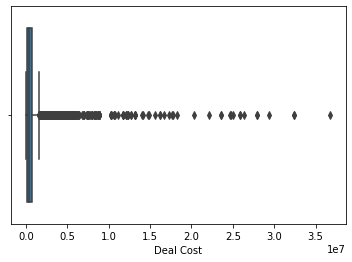

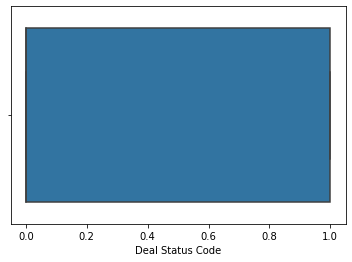

In [18]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns):
    boxplots(i)

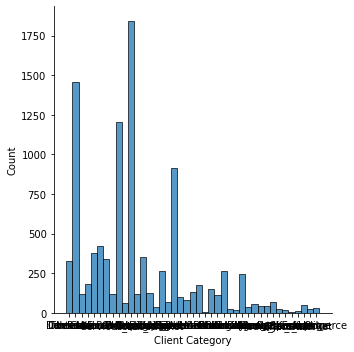

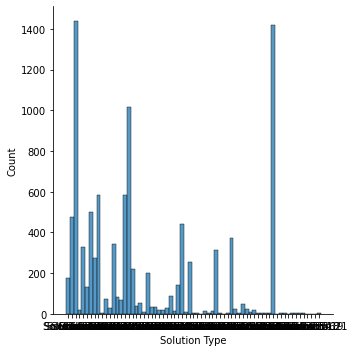

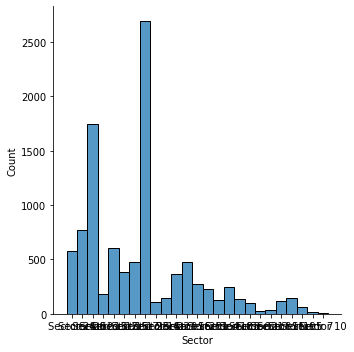

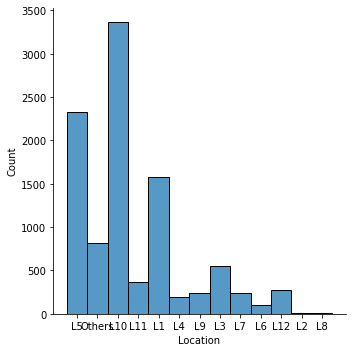

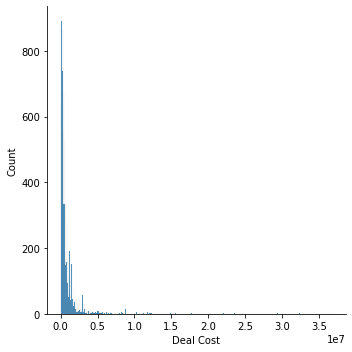

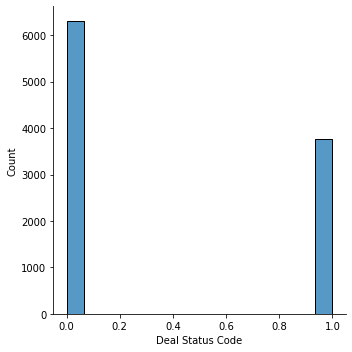

In [19]:
def displots(col):
    sns.displot(df[col])
    plt.show()
    
for i in list(df.columns):
    displots(i)

In [20]:
Q1 =df['Deal Cost'].quantile(0.25)
Q3 =df['Deal Cost'].quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [21]:
for i in df['Deal Cost']:
    if i > pos_outlier or i < neg_outlier:
        df['Deal Cost'] = df['Deal Cost'].replace(i, np.median(df['Deal Cost']))

<AxesSubplot:xlabel='Deal Cost'>

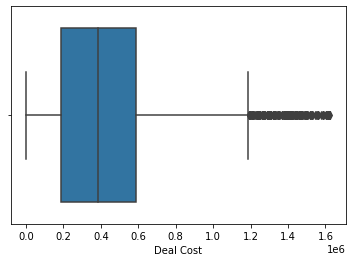

In [22]:
sns.boxplot(x='Deal Cost', data = df)

<AxesSubplot:>

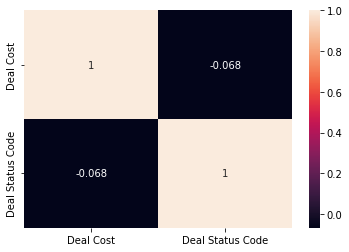

In [23]:
sns.heatmap(df.corr(), annot=True)

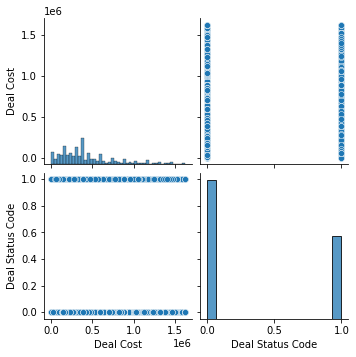

In [24]:
sns.pairplot(df)

## Step 3 - Encoding

In [25]:
df['Location'] = df['Location'].astype('category')
df['Location'] = df['Location'].cat.codes

df['Client Category'] = df['Client Category'].astype('category')
df['Client Category'] = df['Client Category'].cat.codes

df['Solution Type'] = df['Solution Type'].astype('category')
df['Solution Type'] = df['Solution Type'].cat.codes

df['Sector'] = df['Sector'].astype('category')
df['Sector'] = df['Sector'].cat.codes

In [26]:
df = pd.get_dummies(df, columns =  ['Client Category', 'Location', 'Solution Type', 'Sector'])

In [27]:
df = df.drop(['Client Category_0', 'Location_0', 'Solution Type_0', 'Sector_0'], axis=1)

In [28]:
df.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

## Spliting data into independent and dependent

In [29]:
x = df.drop(['Deal Status Code'], axis=1)
y = df['Deal Status Code']

## Step 4 - Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler 

In [31]:
sc = StandardScaler()
x = sc.fit_transform(x)

## Step 5 - Handling Imbalance Dataset

In [32]:
import imblearn

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(x, y)

## Split into test and train dataset

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9459, 143)
(3153, 143)
(9459,)
(3153,)


## Model Building

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [39]:
print(confusion_matrix(y_train, y_pred_dt_train))
print("##"*24)
print(confusion_matrix(y_test, y_pred_dt_test))

[[4659   58]
 [  97 4645]]
################################################
[[1441  148]
 [ 253 1311]]


In [40]:
print(classification_report(y_train, y_pred_dt_train))
print("##"*24)
print(classification_report(y_test, y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4717
           1       0.99      0.98      0.98      4742

    accuracy                           0.98      9459
   macro avg       0.98      0.98      0.98      9459
weighted avg       0.98      0.98      0.98      9459

################################################
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1589
           1       0.90      0.84      0.87      1564

    accuracy                           0.87      3153
   macro avg       0.87      0.87      0.87      3153
weighted avg       0.87      0.87      0.87      3153



In [41]:
print("Decision Tree :-")
print("="*30)
print("Train Accuracy : ", accuracy_score(y_train, y_pred_dt_train))
print("="*30)
print("Test Accuracy : ", accuracy_score(y_test, y_pred_dt_test))

Decision Tree :-
Train Accuracy :  0.983613489798076
Test Accuracy :  0.8728195369489375


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [44]:
print(confusion_matrix(y_train, y_pred_rf_train))
print("##"*24)
print(confusion_matrix(y_test, y_pred_rf_test))

[[4638   79]
 [  76 4666]]
################################################
[[1442  147]
 [ 253 1311]]


In [45]:
print(classification_report(y_train, y_pred_rf_train))
print("##"*24)
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4717
           1       0.98      0.98      0.98      4742

    accuracy                           0.98      9459
   macro avg       0.98      0.98      0.98      9459
weighted avg       0.98      0.98      0.98      9459

################################################
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1589
           1       0.90      0.84      0.87      1564

    accuracy                           0.87      3153
   macro avg       0.87      0.87      0.87      3153
weighted avg       0.87      0.87      0.87      3153



In [46]:
print("Random Forest :-")
print("="*30)
print("Train Accuracy : ", accuracy_score(y_train, y_pred_rf_train))
print("="*30)
print("Test Accuracy : ", accuracy_score(y_test, y_pred_rf_test))

Random Forest :-
Train Accuracy :  0.983613489798076
Test Accuracy :  0.8731366952109102


### AUC Curve

In [47]:
from sklearn.metrics import roc_curve,auc

0.872862140450894


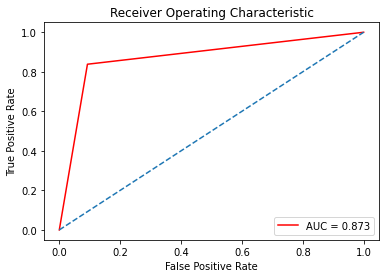

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_test)
rf_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
rf_auc = auc(fpr,tpr)
print(rf_auc)
plt.show()

## Cross Validation

In [49]:
# cross validation
## Decison Tree

from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(dtree, x_train, y_train, cv=15)
test_accuracy = cross_val_score(dtree, x_test, y_test, cv=15)

print("Train Accuracy : ",train_accuracy)
print("#######"*10)
print("Test Accuracy : ", test_accuracy)

Train Accuracy :  [0.80824089 0.84944532 0.83993661 0.86212361 0.85736926 0.84944532
 0.87321712 0.86212361 0.82408875 0.85714286 0.85873016 0.86666667
 0.82698413 0.85396825 0.86507937]
######################################################################
Test Accuracy :  [0.74407583 0.67298578 0.69668246 0.66666667 0.73809524 0.7
 0.66190476 0.66190476 0.7        0.68095238 0.72857143 0.6952381
 0.68571429 0.6952381  0.67142857]


In [50]:
# cross validation
## Random forest
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(rf, x_train, y_train, cv=15)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=15)

print("Train Accuracy : ",train_accuracy)
print("#######"*10)
print("Test Accuracy : ", test_accuracy)

Train Accuracy :  [0.81458003 0.86529319 0.84469097 0.87321712 0.86212361 0.85419968
 0.87797147 0.86529319 0.84786054 0.85079365 0.86825397 0.84285714
 0.84444444 0.85079365 0.86507937]
######################################################################
Test Accuracy :  [0.7535545  0.68246445 0.68246445 0.71904762 0.73333333 0.75714286
 0.71428571 0.70952381 0.69047619 0.77142857 0.70952381 0.73809524
 0.68095238 0.73333333 0.71428571]


### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

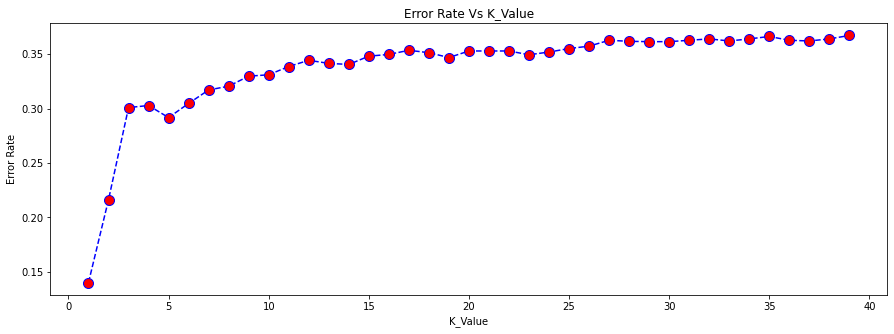

In [53]:
plt.figure(figsize=(15,5))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle='dashed', marker='o',
        markerfacecolor = 'red', markersize=10)
plt.title("Error Rate Vs K_Value")
plt.xlabel("K_Value")
plt.ylabel("Error Rate")
plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)

In [56]:
print("KNN :--")
print("="*30)
print("Train Accuracy : ",accuracy_score(y_train, y_pred_knn_train))
print("-"*30)
print("Test Accuracy : ",accuracy_score(y_test, y_pred_knn_test))

KNN :--
Train Accuracy :  0.983084892694788
------------------------------
Test Accuracy :  0.8598160482080558


In [57]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=1)
xgb = XGBClassifier()
gboost = GradientBoostingClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()

In [58]:
Models = [dtree, rf, knn, xgb, gboost, ada, gnb, bnb]

In [59]:
for i in Models:
    x = i.fit(x_train, y_train)
    tr = i.predict(x_train)
    te = i.predict(x_test)
    print()
    print("*****",i,"*****")
    print()
    print("Train Accuracy : ", accuracy_score(y_train, tr))
    print("Test Accuracy : ", accuracy_score(y_test, te))


***** DecisionTreeClassifier() *****

Train Accuracy :  0.983613489798076
Test Accuracy :  0.8693307960672375

***** RandomForestClassifier() *****

Train Accuracy :  0.983613489798076
Test Accuracy :  0.8731366952109102

***** KNeighborsClassifier(n_neighbors=1) *****

Train Accuracy :  0.983084892694788
Test Accuracy :  0.8598160482080558

***** XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state

In [64]:
# Only for getting Accuracy data in table format
data = {'Models' : ['Decision Tree', 'Random Forest', 'KNN', 'XGB', 'GBoost', 'AdaBoost', 'GaussianNB', 'BernoulliNB'],
'Train' : [0.98, 0.98, 0.98, 0.83, 0.69, 0.66, 0.53, 0.62],
'Test' : [0.86, 0.88, 0.85, 0.76, 0.68, 0.67, 0.53, 0.62]}

In [65]:
df = pd.DataFrame(data)

In [66]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

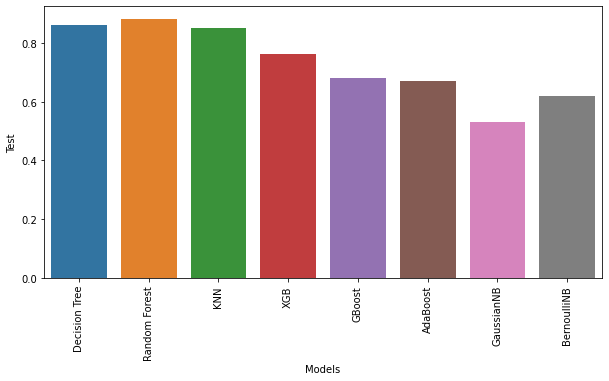

In [67]:
sns.barplot(x='Models', y='Test', data=df)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(rotation=90)
plt.show()